In [33]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

import eli5

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [34]:
veri = pd.read_csv("zingat4.csv",header=None)

In [35]:
veri = veri.drop([0,2,5,6], axis=1)

In [36]:
veri = veri.drop(0, axis=0)
veri = veri.reset_index(level=0, drop=True)

In [37]:
veri

,1,3,4,7,8,9,10,11
0,2150000,5-10,5,Konut,100 M2,2+1,3.Kat,Kombi Doğalgaz
1,4610000,5-10,3,Konut,250 M2,5+1,Bahçe Dublex,Kombi Doğalgaz
2,1200000,0 (Yeni),4,Konut,110 M2,3+1,Yüksek Giriş,Kombi Doğalgaz
3,800000,16-20,6,Konut,125 M2,2+1,6.Kat,Kombi Doğalgaz
4,1850000,2,7,Konut,145 M2,3+1,3.Kat,Merkezi Doğalgaz
...,...,...,...,...,...,...,...,...
1302,2100000,0 (Yeni),6,Konut,130 M2,3+1,3.Kat,Yerden Isıtma
1303,1550000,11-15,3,Konut,115 M2,3+1,1.Kat,Kombi Doğalgaz
1304,2995000,5-10,2,Konut,130 M2,3+1,1.Kat,Kombi Doğalgaz
1305,550000,21 Ve Üzeri,5,Konut,75 M2,2+1,5.Kat,Kombi Doğalgaz


,1,3,4,7,8,9,10,11
0,2150000,5-10,5,Konut,100 M2,2+1,3.Kat,Kombi Doğalgaz
1,4610000,5-10,3,Konut,250 M2,5+1,Bahçe Dublex,Kombi Doğalgaz
2,1200000,0 (Yeni),4,Konut,110 M2,3+1,Yüksek Giriş,Kombi Doğalgaz
3,800000,16-20,6,Konut,125 M2,2+1,6.Kat,Kombi Doğalgaz
4,1850000,2,7,Konut,145 M2,3+1,3.Kat,Merkezi Doğalgaz
...,...,...,...,...,...,...,...,...
1302,2100000,0 (Yeni),6,Konut,130 M2,3+1,3.Kat,Yerden Isıtma
1303,1550000,11-15,3,Konut,115 M2,3+1,1.Kat,Kombi Doğalgaz
1304,2995000,5-10,2,Konut,130 M2,3+1,1.Kat,Kombi Doğalgaz
1305,550000,21 Ve Üzeri,5,Konut,75 M2,2+1,5.Kat,Kombi Doğalgaz


In [38]:
for index,değişken in enumerate(veri[7]):
    if değişken=="2":
        veri = veri.drop(index,axis=0)
veri = veri.reset_index(level=0, drop=True)

In [39]:
"""
i = 0
while( i <= len(veri[2])-1):
    veri[2][i] = veri[2][i].replace("M2","")
    veri[2][i] = veri[2][i].replace(" ","")
    veri[2][i] = veri[2][i].replace(".","")
    veri[2][i] = int(veri[2][i])
    i += 1
for index,değişken in enumerate(veri[2]):
    if değişken>1653:
        veri = veri.drop(index,axis=0)
veri = veri.reset_index(level=0, drop=True)
"""

'\ni = 0\nwhile( i <= len(veri[2])-1):\n    veri[2][i] = veri[2][i].replace("M2","")\n    veri[2][i] = veri[2][i].replace(" ","")\n    veri[2][i] = veri[2][i].replace(".","")\n    veri[2][i] = int(veri[2][i])\n    i += 1\nfor index,değişken in enumerate(veri[2]):\n    if değişken>1653:\n        veri = veri.drop(index,axis=0)\nveri = veri.reset_index(level=0, drop=True)\n'

'\ni = 0\nwhile( i <= len(veri[2])-1):\n    veri[2][i] = veri[2][i].replace("M2","")\n    veri[2][i] = veri[2][i].replace(" ","")\n    veri[2][i] = veri[2][i].replace(".","")\n    veri[2][i] = int(veri[2][i])\n    i += 1\nfor index,değişken in enumerate(veri[2]):\n    if değişken>1653:\n        veri = veri.drop(index,axis=0)\nveri = veri.reset_index(level=0, drop=True)\n'

In [40]:
i = 0
while( i <= len(veri[8])-1):
    veri[8][i] = veri[8][i].replace("M2","")
    veri[8][i] = veri[8][i].replace(" ","")
    veri[8][i] = veri[8][i].replace(".","")
    veri[8][i] = int(veri[8][i])
    i += 1

C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\2905418762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[8][i] = veri[8][i].replace("M2","")
C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\2905418762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[8][i] = veri[8][i].replace(" ","")
C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\2905418762.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[8][i] = veri[8

In [41]:
i = 0
while i<=len(veri[3])-1:
    if (veri[3][i] == "5-10"):
        veri[3][i] = 8
    elif veri[3][i] == "21 Ve Üzeri":
        veri[3][i] = 25
    elif veri[3][i] == "16-20":
        veri[3][i] = 18
    elif veri[3][i] == "0 (Yeni)":
        veri[3][i] = 0
    elif veri[3][i] == "11-15":
        veri[3][i] = 13
    i+=1
for index,değişken in enumerate(veri[3]):
    if type(değişken) == str:
        veri[3][index] = int(veri[3][index])

C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\838994572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[3][i] = 8
C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\838994572.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[3][i] = 0
C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\838994572.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[3][i] = 18
C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\838994

In [42]:
for index,değişken in enumerate(veri[9]):
    if veri[9][index] == "8+ Oda":
        veri[9][index] = 10
    elif veri[9][index] == "3+1" or veri[9][index] == "2+2" or veri[9][index] == "2.5+1" :
        veri[9][index] = 4
    elif veri[9][index] == "2+1" or veri[9][index] == "1.5+1":
        veri[9][index] = 3
    elif veri[9][index] == "1 Oda" or veri[9][index] == "Stüdyo":
        veri[9][index] = 1
    elif veri[9][index] == "1+1" or veri[9][index] == "2+0":
        veri[9][index] = 2
    elif veri[9][index] == "4+1" or veri[9][index] == "3+2" or veri[9][index] == "3.5+1":
        veri[9][index] = 5
    elif veri[9][index] == "4+2" or veri[9][index] == "5+1" or veri[9][index] == "4.5+1":
        veri[9][index] = 6
    elif veri[9][index] == "5+2" or veri[9][index] == "6+1":
        veri[9][index] = 7
    elif veri[9][index] == "5+3" or veri[9][index] == "7+1" or veri[9][index] == "6+2":
        veri[9][index] = 8
    elif veri[9][index] == "6+3":
        veri[9][index] = 9
    elif type(değişken) == str:
        veri = veri.drop(index, axis=0)
veri = veri.reset_index(level=0, drop=True)

C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\330566514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[9][index] = 3
C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\330566514.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[9][index] = 6
C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\330566514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[9][index] = 4
C:\Users\umut6\AppData\Local\Temp\ipykernel_1

In [43]:
i = 0
while( i <= len(veri[10])-1):
    veri[10][i] = veri[10][i].replace(".Kat","")
    if veri[10][i] == "Kot 1 (-1)" or veri[10][i] == "Tam Bodrum" or veri[10][i] == "Yüksek Bodrum" or veri[10][i] == "Yarı Bodrum":
        veri[10][i] = -1
    elif veri[10][i] == "Kot 3 (-3)":
        veri[10][i] = -3
    elif veri[10][i] == "Kot 2 (-2)":
        veri[10][i] = -2
    elif veri[10][i] == "Bahçe Katı" or veri[10][i] == "Yüksek Giriş" or veri[10][i] == "Düz Giriş":
        veri[10][i] = 1
    elif veri[10][i] == "10-20":
        veri = veri.drop(i,axis=0)
    elif veri[10][i] == "Konut":
        veri = veri.drop(i,axis=0)
    i += 1
veri = veri.reset_index(level=0, drop=True)

C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\115048791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[10][i] = veri[10][i].replace(".Kat","")
C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\115048791.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[10][i] = 1
C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\115048791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[10][i] = -1
C:\Users\umut6\AppData\L

In [44]:
for index,değişken in enumerate(veri[10]):
    if değişken == "Çatı Dubleks":
        veri[7][index] = "Dubleks"
        veri[10][index] = veri[4][index]
    elif değişken == "Villa Tipi":
        veri[7][index] = "Villa"
        veri[10][index] = veri[4][index]
    elif değişken == "Müstakil":
        veri[7][index] = "Müstakil"
        veri[10][index] = veri[4][index]
    elif değişken == "Bahçe Dublex":
        veri[7][index] = "Dubleks"
        veri[10][index] = veri[4][index]
    elif değişken == "Çatı Katı":
        veri = veri.drop(index,axis=0)
veri = veri.reset_index(level=0, drop=True)

C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\1065379546.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[7][index] = "Dubleks"
C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\1065379546.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[10][index] = veri[4][index]
C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\1065379546.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[7][index] = "Müstakil"
C:\Users\u

In [45]:
veri = veri.reset_index(level=0, drop=True)

In [46]:
for indexi,değişken in enumerate(veri[3]):
    if (type(değişken)==str):
        veri = veri.drop(indexi,axis=0)
veri = veri.reset_index(level=0, drop=True)

In [47]:
veri[4].unique()
for index,değişken in enumerate(veri[4]):
    if değişken == "Sobalı":
        veri = veri.drop(index,axis=0)
    elif değişken == "Kombi Doğalgaz":
        veri = veri.drop(index,axis=0)
    elif değişken == "Isıtma Yok":
        veri = veri.drop(index,axis=0)
    elif değişken == "Doğalgaz Sobalı":
        veri = veri.drop(index,axis=0)
    elif değişken == "Kombi Fueloil":
        veri = veri.drop(index,axis=0)
veri = veri.reset_index(level=0, drop=True)
for index,değişken in enumerate(veri[4]):
    if type(değişken)==str:
        veri[4][index] = int(veri[4][index])
veri = veri.reset_index(level=0, drop=True)

C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\1295469845.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[4][index] = int(veri[4][index])
C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\1295469845.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[4][index] = int(veri[4][index])


In [48]:
for index,değişken in enumerate(veri[11]):
    if değişken == "Merkezi (Pay Ölçer)" or değişken == "Merkezi Doğalgaz" or değişken == "Merkezi Kömür":
        veri[11][index] = "Merkezi"
veri = veri.reset_index(level=0, drop=True)

C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\1903449015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[11][index] = "Merkezi"
C:\Users\umut6\AppData\Local\Temp\ipykernel_19936\1903449015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri[11][index] = "Merkezi"


In [49]:
"""nlist = [3,4,8,9,10]
for i in nlist:
    mms = MinMaxScaler()
    veri[i] =  mms.fit_transform(veri[i].values.reshape(-1,1))"""

'nlist = [3,4,8,9,10]\nfor i in nlist:\n    mms = MinMaxScaler()\n    veri[i] =  mms.fit_transform(veri[i].values.reshape(-1,1))'

'nlist = [3,4,8,9,10]\nfor i in nlist:\n    mms = MinMaxScaler()\n    veri[i] =  mms.fit_transform(veri[i].values.reshape(-1,1))'

In [50]:
veri1 = pd.get_dummies(veri[[7,11]])
veri = veri.drop([7,11],axis=1)
dataFrame = pd.concat([veri,veri1], axis=1)
dataFrame.rename(columns={1:'Fiyat', 3:'Yaş', 
                          4:'Bina Kat', 8:'Net Metrekare', 9:'Oda Sayısı', 
                          10:'Kaçıncı Kat'}, inplace=True)

In [51]:
dataFrame = dataFrame.drop("11_Isıtma Yok", axis=1)
dataFrame

,Fiyat,Yaş,Bina Kat,Net Metrekare,Oda Sayısı,Kaçıncı Kat,7_Dubleks,7_Konut,7_Müstakil,7_Villa,11_Doğalgaz Sobalı,11_Kat Kaloriferi,11_Klimalı,11_Kombi Doğalgaz,11_Kombi Fueloil,11_Merkezi,11_Sobalı,11_Yerden Isıtma
0,2150000,8,5,100,3,3,0,1,0,0,0,0,0,1,0,0,0,0
1,4610000,8,3,250,6,3,1,0,0,0,0,0,0,1,0,0,0,0
2,1200000,0,4,110,4,1,0,1,0,0,0,0,0,1,0,0,0,0
3,800000,18,6,125,3,6,0,1,0,0,0,0,0,1,0,0,0,0
4,1850000,2,7,145,4,3,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,2100000,0,6,130,4,3,0,1,0,0,0,0,0,0,0,0,0,1
1263,1550000,13,3,115,4,1,0,1,0,0,0,0,0,1,0,0,0,0
1264,2995000,8,2,130,4,1,0,1,0,0,0,0,0,1,0,0,0,0
1265,550000,25,5,75,3,5,0,1,0,0,0,0,0,1,0,0,0,0


,Fiyat,Yaş,Bina Kat,Net Metrekare,Oda Sayısı,Kaçıncı Kat,7_Dubleks,7_Konut,7_Müstakil,7_Villa,11_Doğalgaz Sobalı,11_Kat Kaloriferi,11_Klimalı,11_Kombi Doğalgaz,11_Kombi Fueloil,11_Merkezi,11_Sobalı,11_Yerden Isıtma
0,2150000,8,5,100,3,3,0,1,0,0,0,0,0,1,0,0,0,0
1,4610000,8,3,250,6,3,1,0,0,0,0,0,0,1,0,0,0,0
2,1200000,0,4,110,4,1,0,1,0,0,0,0,0,1,0,0,0,0
3,800000,18,6,125,3,6,0,1,0,0,0,0,0,1,0,0,0,0
4,1850000,2,7,145,4,3,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,2100000,0,6,130,4,3,0,1,0,0,0,0,0,0,0,0,0,1
1263,1550000,13,3,115,4,1,0,1,0,0,0,0,0,1,0,0,0,0
1264,2995000,8,2,130,4,1,0,1,0,0,0,0,0,1,0,0,0,0
1265,550000,25,5,75,3,5,0,1,0,0,0,0,0,1,0,0,0,0


In [52]:
x = dataFrame.drop("Fiyat", axis=1)
y = dataFrame["Fiyat"]

In [97]:
trainX, testX, trainY, testY = train_test_split(x,y, train_size=0.80, shuffle=True)

In [98]:
lr_model = LinearRegression()
lr_model.fit(trainX,trainY)
lr_predicted = lr_model.predict(testX)
print(lr_model.score(testX,testY))
print("Yanılma Payı: ",  mean_absolute_error(testY, lr_predicted), "TL")
print("Ortalama Doğruluk oranı:",100-sum(abs(lr_predicted-testY)/testY)/len(testY)*100)

0.5056589685432537
Yanılma Payı:  628807.0464572314 TL
Ortalama Doğruluk oranı: 55.97348096295606
0.5056589685432537
Yanılma Payı:  628807.0464572314 TL
Ortalama Doğruluk oranı: 55.97348096295606


In [99]:
rf_model = RandomForestRegressor(n_estimators=1000).fit(trainX, trainY) 
rf_predicted = rf_model.predict(testX)
print(rf_model.score(testX,testY))
print("Yanılma Payı: ",  mean_absolute_error(testY, rf_predicted), "TL")
print("Ortalama Doğruluk Oranı=",100-sum(abs(rf_predicted-testY)/testY)/len(testY)*100)

0.3699790464127959
Yanılma Payı:  564079.0223287197 TL
Ortalama Doğruluk Oranı= 62.66555200020235
0.3699790464127959
Yanılma Payı:  564079.0223287197 TL
Ortalama Doğruluk Oranı= 62.66555200020235


In [100]:
ensemble_clf = VotingRegressor(estimators=[('rf', rf_model), ('lr', lr_model)])
ensemble_clf.fit(trainX, trainY)
clf_predicted = ensemble_clf.predict(testX)
print(ensemble_clf.score(testX, testY))
print("Yanılma Payı: ", mean_absolute_error(clf_predicted,testY)," TL")
print("Ortalama Doğruluk Oranı=",100-sum(abs(clf_predicted-testY)/testY)/len(testY)*100)

0.5510312674237491
Yanılma Payı:  562653.1063356369  TL
Ortalama Doğruluk Oranı= 60.98558989758852
0.5510312674237491
Yanılma Payı:  562653.1063356369  TL
Ortalama Doğruluk Oranı= 60.98558989758852


In [101]:
input_names = []
for i in dataFrame.drop("Fiyat",axis=1).columns:
    input_names.append(str(i))

In [102]:
eli5.show_weights(lr_model, feature_names=input_names)

Weight?,Feature
+2131690.359,11_Kat Kaloriferi
+1968908.199,7_Villa
+1123842.723,11_Yerden Isıtma
+732266.732,11_Klimalı
+633283.809,11_Kombi Fueloil
+575766.857,Oda Sayısı
+475718.002,11_Merkezi
+442770.802,11_Kombi Doğalgaz
+221440.924,11_Sobalı
+98121.993,11_Doğalgaz Sobalı


Weight?,Feature
+2131690.359,11_Kat Kaloriferi
+1968908.199,7_Villa
+1123842.723,11_Yerden Isıtma
+732266.732,11_Klimalı
+633283.809,11_Kombi Fueloil
+575766.857,Oda Sayısı
+475718.002,11_Merkezi
+442770.802,11_Kombi Doğalgaz
+221440.924,11_Sobalı
+98121.993,11_Doğalgaz Sobalı


In [103]:
eli5.show_weights(rf_model, feature_names=input_names)

Weight,Feature
0.5494 ± 0.0836,Net Metrekare
0.0917 ± 0.0462,Kaçıncı Kat
0.0897 ± 0.0420,Yaş
0.0805 ± 0.0366,Bina Kat
0.0554 ± 0.0583,Oda Sayısı
0.0401 ± 0.0452,11_Yerden Isıtma
0.0220 ± 0.0310,7_Villa
0.0166 ± 0.0275,11_Kat Kaloriferi
0.0157 ± 0.0318,11_Sobalı
0.0143 ± 0.0232,11_Kombi Doğalgaz


Weight,Feature
0.5494 ± 0.0836,Net Metrekare
0.0917 ± 0.0462,Kaçıncı Kat
0.0897 ± 0.0420,Yaş
0.0805 ± 0.0366,Bina Kat
0.0554 ± 0.0583,Oda Sayısı
0.0401 ± 0.0452,11_Yerden Isıtma
0.0220 ± 0.0310,7_Villa
0.0166 ± 0.0275,11_Kat Kaloriferi
0.0157 ± 0.0318,11_Sobalı
0.0143 ± 0.0232,11_Kombi Doğalgaz


In [104]:
for i in range(len(testX)):
    print(i, ". Test Değeri")
    print("Lineer Regresyon Tahmini        = ",int(lr_predicted[i]),"TL"," / Aradaki fark = ", int(lr_predicted[i]-testY.iloc[i]),"TL", " / Hata Oranı = ", "%",int((lr_predicted[i]-testY.iloc[i])/testY.iloc[i]*100))
    print("Random Forest Tahmini           = ",int(rf_predicted[i]),"TL"," / Aradaki fark = ", int(rf_predicted[i]-testY.iloc[i]),"TL", " / Hata Oranı = ", "%",int((rf_predicted[i]-testY.iloc[i])/testY.iloc[i]*100))
    print("2 Algoritmanın Birleşim Tahmini = ",int(clf_predicted[i]),"TL"," / Aradaki fark = ", int(clf_predicted[i]-testY.iloc[i]),"TL", " / Hata Oranı = ","%", int((clf_predicted[i]-testY.iloc[i])/testY.iloc[i]*100))
    print("Gerçek Sonuç                    = ",testY.iloc[i],"TL")
    print("----------------------------------------------------------------------------------------------------")

0 . Test Değeri
Lineer Regresyon Tahmini        =  1161968 TL  / Aradaki fark =  376968 TL  / Hata Oranı =  % 48
Random Forest Tahmini           =  981404 TL  / Aradaki fark =  196404 TL  / Hata Oranı =  % 25
2 Algoritmanın Birleşim Tahmini =  1064823 TL  / Aradaki fark =  279823 TL  / Hata Oranı =  % 35
Gerçek Sonuç                    =  785000 TL
----------------------------------------------------------------------------------------------------
1 . Test Değeri
Lineer Regresyon Tahmini        =  1302344 TL  / Aradaki fark =  112344 TL  / Hata Oranı =  % 9
Random Forest Tahmini           =  1443707 TL  / Aradaki fark =  253707 TL  / Hata Oranı =  % 21
2 Algoritmanın Birleşim Tahmini =  1367009 TL  / Aradaki fark =  177009 TL  / Hata Oranı =  % 14
Gerçek Sonuç                    =  1190000 TL
----------------------------------------------------------------------------------------------------
2 . Test Değeri
Lineer Regresyon Tahmini        =  1628137 TL  / Aradaki fark =  -371862 TL  / 

----------------------------------------------------------------------------------------------------0 . Test Değeri
Lineer Regresyon Tahmini        =  1161968 TL  / Aradaki fark =  376968 TL  / Hata Oranı =  % 48
Random Forest Tahmini           =  981404 TL  / Aradaki fark =  196404 TL  / Hata Oranı =  % 25
2 Algoritmanın Birleşim Tahmini =  1064823 TL  / Aradaki fark =  279823 TL  / Hata Oranı =  % 35
Gerçek Sonuç                    =  785000 TL
----------------------------------------------------------------------------------------------------
1 . Test Değeri
Lineer Regresyon Tahmini        =  1302344 TL  / Aradaki fark =  112344 TL  / Hata Oranı =  % 9
Random Forest Tahmini           =  1443707 TL  / Aradaki fark =  253707 TL  / Hata Oranı =  % 21
2 Algoritmanın Birleşim Tahmini =  1367009 TL  / Aradaki fark =  177009 TL  / Hata Oranı =  % 14
Gerçek Sonuç                    =  1190000 TL
------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
60 . Test Değeri
Lineer Regresyon Tahmini        =  762797 TL  / Aradaki fark =  -1187202 TL  / Hata Oranı =  % -60
Random Forest Tahmini           =  1769008 TL  / Aradaki fark =  -180992 TL  / Hata Oranı =  % -9
2 Algoritmanın Birleşim Tahmini =  1269678 TL  / Aradaki fark =  -680321 TL  / Hata Oranı =  % -34
Gerçek Sonuç                    =  1950000 TL
----------------------------------------------------------------------------------------------------
61 . Test Değeri
Lineer Regresyon Tahmini        =  1802732 TL  / Aradaki fark =  152732 TL  / Hata Oranı =  % 9
Random Forest Tahmini           =  1976461 TL  / Aradaki fark =  326461 TL  / Hata Oranı =  % 19
2 Algoritmanın Birleşim Tahmini =  1895912 TL  / Aradaki fark =  245912 TL  / Hata Oranı =  % 14
Gerçek Sonuç                    =  1650000 TL
--------------------------------------------------------------------------------------

Random Forest Tahmini           =  1212579 TL 
60 . Test Değeri
Lineer Regresyon Tahmini        =  762797 TL  / Aradaki fark =  -1187202 TL  / Hata Oranı =  % -60
Random Forest Tahmini           =  1769008 TL  / Aradaki fark =  -180992 TL  / Hata Oranı =  % -9
2 Algoritmanın Birleşim Tahmini =  1269678 TL  / Aradaki fark =  -680321 TL  / Hata Oranı =  % -34
Gerçek Sonuç                    =  1950000 TL
----------------------------------------------------------------------------------------------------
61 . Test Değeri
Lineer Regresyon Tahmini        =  1802732 TL  / Aradaki fark =  152732 TL  / Hata Oranı =  % 9
Random Forest Tahmini           =  1976461 TL  / Aradaki fark =  326461 TL  / Hata Oranı =  % 19
2 Algoritmanın Birleşim Tahmini =  1895912 TL  / Aradaki fark =  245912 TL  / Hata Oranı =  % 14
Gerçek Sonuç                    =  1650000 TL
----------------------------------------------------------------------------------------------------
62 . Test Değeri
Lineer Regresyon Tahmi

Random Forest Tahmini           =  1212579 TL  / Aradaki fark =  -86420 TL  / Hata Oranı =  % -6
2 Algoritmanın Birleşim Tahmini =  1795825 TL  / Aradaki fark =  496825 TL  / Hata Oranı =  % 38
Gerçek Sonuç                    =  1299000 TL
----------------------------------------------------------------------------------------------------
106 . Test Değeri
Lineer Regresyon Tahmini        =  3012449 TL  / Aradaki fark =  62449 TL  / Hata Oranı =  % 2
Random Forest Tahmini           =  4874960 TL  / Aradaki fark =  1924960 TL  / Hata Oranı =  % 65
2 Algoritmanın Birleşim Tahmini =  3911014 TL  / Aradaki fark =  961014 TL  / Hata Oranı =  % 32
Gerçek Sonuç                    =  2950000 TL
----------------------------------------------------------------------------------------------------
107 . Test Değeri
Lineer Regresyon Tahmini        =  1687670 TL  / Aradaki fark =  737670 TL  / Hata Oranı =  % 77
Random Forest Tahmini           =  1131247 TL  / Aradaki fark =  181247 TL  / Hata Oranı 

2 Algoritmanın Birleşim Tahmini =  2086549 TL  / Aradaki fark =  126549 TL  / Hata Oranı =  % 6 / Aradaki fark =  -86420 TL  / Hata Oranı =  % -6
2 Algoritmanın Birleşim Tahmini =  1795825 TL  / Aradaki fark =  496825 TL  / Hata Oranı =  % 38
Gerçek Sonuç                    =  1299000 TL
----------------------------------------------------------------------------------------------------
106 . Test Değeri
Lineer Regresyon Tahmini        =  3012449 TL  / Aradaki fark =  62449 TL  / Hata Oranı =  % 2
Random Forest Tahmini           =  4874960 TL  / Aradaki fark =  1924960 TL  / Hata Oranı =  % 65
2 Algoritmanın Birleşim Tahmini =  3911014 TL  / Aradaki fark =  961014 TL  / Hata Oranı =  % 32
Gerçek Sonuç                    =  2950000 TL
----------------------------------------------------------------------------------------------------
107 . Test Değeri
Lineer Regresyon Tahmini        =  1687670 TL  / Aradaki fark =  737670 TL  / Hata Oranı =  % 77
Random Forest Tahmini           =  11312

2 Algoritmanın Birleşim Tahmini =  2086549 TL  / Aradaki fark =  126549 TL  / Hata Oranı =  % 6
Gerçek Sonuç                    =  1960000 TL
----------------------------------------------------------------------------------------------------
151 . Test Değeri
Lineer Regresyon Tahmini        =  2185577 TL  / Aradaki fark =  135577 TL  / Hata Oranı =  % 6
Random Forest Tahmini           =  2239991 TL  / Aradaki fark =  189991 TL  / Hata Oranı =  % 9
2 Algoritmanın Birleşim Tahmini =  2216383 TL  / Aradaki fark =  166383 TL  / Hata Oranı =  % 8
Gerçek Sonuç                    =  2050000 TL
----------------------------------------------------------------------------------------------------
152 . Test Değeri
Lineer Regresyon Tahmini        =  2694224 TL  / Aradaki fark =  94224 TL  / Hata Oranı =  % 3
Random Forest Tahmini           =  2052158 TL  / Aradaki fark =  -547842 TL  / Hata Oranı =  % -21
2 Algoritmanın Birleşim Tahmini =  2351734 TL  / Aradaki fark =  -248265 TL  / Hata Oranı = 

Lineer Regresyon Tahmini        =  2129260 TL  / Aradaki fark =  -369739 TL  / Hata Oranı =  % 
Gerçek Sonuç                    =  1960000 TL
----------------------------------------------------------------------------------------------------
151 . Test Değeri
Lineer Regresyon Tahmini        =  2185577 TL  / Aradaki fark =  135577 TL  / Hata Oranı =  % 6
Random Forest Tahmini           =  2239991 TL  / Aradaki fark =  189991 TL  / Hata Oranı =  % 9
2 Algoritmanın Birleşim Tahmini =  2216383 TL  / Aradaki fark =  166383 TL  / Hata Oranı =  % 8
Gerçek Sonuç                    =  2050000 TL
----------------------------------------------------------------------------------------------------
152 . Test Değeri
Lineer Regresyon Tahmini        =  2694224 TL  / Aradaki fark =  94224 TL  / Hata Oranı =  % 3
Random Forest Tahmini           =  2052158 TL  / Aradaki fark =  -547842 TL  / Hata Oranı =  % -21
2 Algoritmanın Birleşim Tahmini =  2351734 TL  / Aradaki fark =  -248265 TL  / Hata Oranı = 

Lineer Regresyon Tahmini        =  2129260 TL  / Aradaki fark =  -369739 TL  / Hata Oranı =  % -14
Random Forest Tahmini           =  3122343 TL  / Aradaki fark =  623343 TL  / Hata Oranı =  % 24
2 Algoritmanın Birleşim Tahmini =  2642378 TL  / Aradaki fark =  143378 TL  / Hata Oranı =  % 5
Gerçek Sonuç                    =  2499000 TL
----------------------------------------------------------------------------------------------------
197 . Test Değeri
Lineer Regresyon Tahmini        =  1481365 TL  / Aradaki fark =  386365 TL  / Hata Oranı =  % 35
Random Forest Tahmini           =  997143 TL  / Aradaki fark =  -97856 TL  / Hata Oranı =  % -8
2 Algoritmanın Birleşim Tahmini =  1245122 TL  / Aradaki fark =  150122 TL  / Hata Oranı =  % 13
Gerçek Sonuç                    =  1095000 TL
----------------------------------------------------------------------------------------------------
198 . Test Değeri
Lineer Regresyon Tahmini        =  1496068 TL  / Aradaki fark =  661068 TL  / Hata Oranı

Random Forest Tahmini           =  1599899 TL  / Aradaki fark =  -101 TL  / Hata Oranı =  % 0-14
Random Forest Tahmini           =  3122343 TL  / Aradaki fark =  623343 TL  / Hata Oranı =  % 24
2 Algoritmanın Birleşim Tahmini =  2642378 TL  / Aradaki fark =  143378 TL  / Hata Oranı =  % 5
Gerçek Sonuç                    =  2499000 TL
----------------------------------------------------------------------------------------------------
197 . Test Değeri
Lineer Regresyon Tahmini        =  1481365 TL  / Aradaki fark =  386365 TL  / Hata Oranı =  % 35
Random Forest Tahmini           =  997143 TL  / Aradaki fark =  -97856 TL  / Hata Oranı =  % -8
2 Algoritmanın Birleşim Tahmini =  1245122 TL  / Aradaki fark =  150122 TL  / Hata Oranı =  % 13
Gerçek Sonuç                    =  1095000 TL
----------------------------------------------------------------------------------------------------
198 . Test Değeri
Lineer Regresyon Tahmini        =  1496068 TL  / Aradaki fark =  661068 TL  / Hata Oranı =

Random Forest Tahmini           =  1599899 TL  / Aradaki fark =  -101 TL  / Hata Oranı =  % 0
2 Algoritmanın Birleşim Tahmini =  1785356 TL  / Aradaki fark =  185356 TL  / Hata Oranı =  % 11
Gerçek Sonuç                    =  1600000 TL
----------------------------------------------------------------------------------------------------
227 . Test Değeri
Lineer Regresyon Tahmini        =  3113622 TL  / Aradaki fark =  1563622 TL  / Hata Oranı =  % 100
Random Forest Tahmini           =  7181086 TL  / Aradaki fark =  5631086 TL  / Hata Oranı =  % 363
2 Algoritmanın Birleşim Tahmini =  5160333 TL  / Aradaki fark =  3610333 TL  / Hata Oranı =  % 232
Gerçek Sonuç                    =  1550000 TL
----------------------------------------------------------------------------------------------------
228 . Test Değeri
Lineer Regresyon Tahmini        =  2167219 TL  / Aradaki fark =  -27780 TL  / Hata Oranı =  % -1
Random Forest Tahmini           =  1706271 TL  / Aradaki fark =  -488728 TL  / Hata O


2 Algoritmanın Birleşim Tahmini =  1785356 TL  / Aradaki fark =  185356 TL  / Hata Oranı =  % 11
Gerçek Sonuç                    =  1600000 TL
----------------------------------------------------------------------------------------------------
227 . Test Değeri
Lineer Regresyon Tahmini        =  3113622 TL  / Aradaki fark =  1563622 TL  / Hata Oranı =  % 100
Random Forest Tahmini           =  7181086 TL  / Aradaki fark =  5631086 TL  / Hata Oranı =  % 363
2 Algoritmanın Birleşim Tahmini =  5160333 TL  / Aradaki fark =  3610333 TL  / Hata Oranı =  % 232
Gerçek Sonuç                    =  1550000 TL
----------------------------------------------------------------------------------------------------
228 . Test Değeri
Lineer Regresyon Tahmini        =  2167219 TL  / Aradaki fark =  -27780 TL  / Hata Oranı =  % -1
Random Forest Tahmini           =  1706271 TL  / Aradaki fark =  -488728 TL  / Hata Oranı =  % -22
2 Algoritmanın Birleşim Tahmini =  1920313 TL  / Aradaki fark =  -274686 TL  / 

In [66]:
ensemble_clf.predict([[8,5,100,3,3,0,0,0,1,0,0,0,1,0,0,0,0]])

C:\Users\umut6\anaconda4\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\umut6\anaconda4\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2642390.69625621])

C:\Users\umut6\anaconda4\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\umut6\anaconda4\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2642390.69625621])

In [62]:
testX.head(39)

,Yaş,Bina Kat,Net Metrekare,Oda Sayısı,Kaçıncı Kat,7_Dubleks,7_Konut,7_Müstakil,7_Villa,11_Doğalgaz Sobalı,11_Kat Kaloriferi,11_Klimalı,11_Kombi Doğalgaz,11_Kombi Fueloil,11_Merkezi,11_Sobalı,11_Yerden Isıtma
300,25,4,100,4,4,0,0,1,0,0,0,0,1,0,0,0,0
82,0,9,175,5,9,0,1,0,0,0,0,0,0,0,0,0,1
307,8,4,90,3,2,0,1,0,0,0,0,0,1,0,0,0,0
1020,13,6,95,3,1,0,1,0,0,0,0,0,1,0,0,0,0
447,25,4,110,4,1,0,1,0,0,0,0,0,1,0,0,0,0
727,8,6,125,4,6,0,1,0,0,0,0,0,1,0,0,0,0
583,8,4,85,3,2,0,1,0,0,0,0,0,1,0,0,0,0
974,25,3,280,6,3,0,0,0,1,0,0,0,1,0,0,0,0
309,0,3,170,5,3,0,1,0,0,0,0,0,0,0,0,0,1
718,8,4,240,4,3,0,1,0,0,0,0,0,1,0,0,0,0


,Yaş,Bina Kat,Net Metrekare,Oda Sayısı,Kaçıncı Kat,7_Dubleks,7_Konut,7_Müstakil,7_Villa,11_Doğalgaz Sobalı,11_Kat Kaloriferi,11_Klimalı,11_Kombi Doğalgaz,11_Kombi Fueloil,11_Merkezi,11_Sobalı,11_Yerden Isıtma
300,25,4,100,4,4,0,0,1,0,0,0,0,1,0,0,0,0
82,0,9,175,5,9,0,1,0,0,0,0,0,0,0,0,0,1
307,8,4,90,3,2,0,1,0,0,0,0,0,1,0,0,0,0
1020,13,6,95,3,1,0,1,0,0,0,0,0,1,0,0,0,0
447,25,4,110,4,1,0,1,0,0,0,0,0,1,0,0,0,0
727,8,6,125,4,6,0,1,0,0,0,0,0,1,0,0,0,0
583,8,4,85,3,2,0,1,0,0,0,0,0,1,0,0,0,0
974,25,3,280,6,3,0,0,0,1,0,0,0,1,0,0,0,0
309,0,3,170,5,3,0,1,0,0,0,0,0,0,0,0,0,1
718,8,4,240,4,3,0,1,0,0,0,0,0,1,0,0,0,0


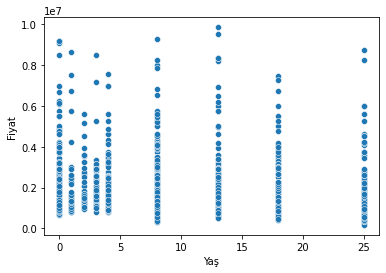

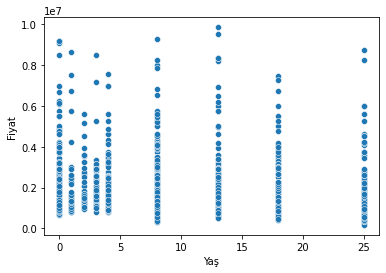

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=dataFrame["Yaş"], y=dataFrame["Fiyat"], data=dataFrame)

# eksen etiketleri ekleme
plt.xlabel("Yaş")
plt.ylabel("Fiyat")

# grafiği gösterme
plt.show()

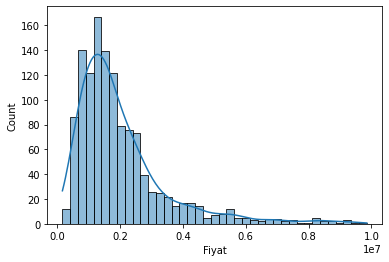

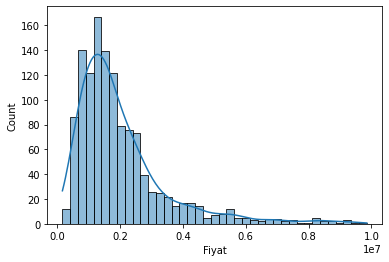

In [64]:
# histogram oluşturma
sns.histplot(dataFrame["Fiyat"], kde=True)

# eksen etiketleri ekleme
plt.xlabel("Fiyat")

# grafiği gösterme
plt.show()